# Fashion MNIST - Neural Network

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

### 데이터 전처리

In [3]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
X_train.shape, X_test.shape, y_train.shape

((60000, 28, 28), (10000, 28, 28), (60000,))

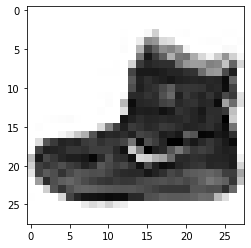

In [5]:
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
class_names[y_train[0]]

'Ankle boot'

In [9]:
import sys
for row in X_train[0]:
    for i in row:
        sys.stdout.write(f'{i:3d} ')
    sys.stdout.write('\n')

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3 
  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15 
  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66 
  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 223 215 213 164 127 

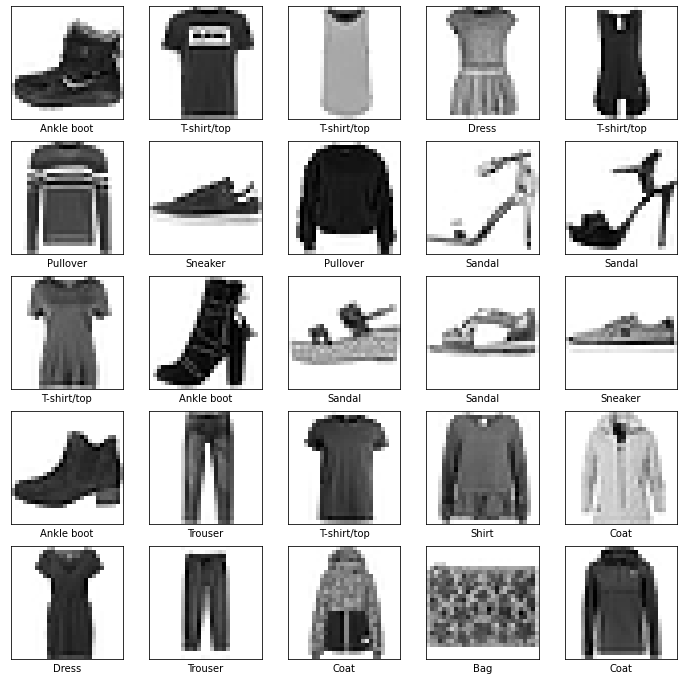

In [10]:
# 훈련 세트에서 처음 25개 이미지와 클래스 이름을 출력
plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [11]:
# 2차원 데이터(28x28)를 1차원으로(784)
X_train = X_train.reshape(-1, 784)

In [12]:
# 0 ~ 1 사이의 값으로 정규화 
X_train = X_train / 255.0
X_train.shape

(60000, 784)

In [13]:
# X_test 에 대해서도 동일하게 처리
X_test = X_test.reshape(-1, 784)
X_test = X_test / 255.0
X_test.shape

(10000, 784)

In [14]:
# One-hot encoding
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
Y_train.shape, Y_test.shape

((60000, 10), (10000, 10))

In [15]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

### 모델 정의, 설정, 학습

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os

In [17]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [18]:
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
# 모델 최적화
model_path = MODEL_DIR + 'best-fashion-mnist-dnn.hdf5'
checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', 
                             verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [21]:
history = model.fit(X_train, Y_train, validation_split=0.2,
                    epochs=50, batch_size=200, verbose=0,
                    callbacks=[checkpoint, early_stopping])


Epoch 00001: val_loss improved from inf to 0.43495, saving model to ./model/best-fashion-mnist-dnn.hdf5

Epoch 00002: val_loss improved from 0.43495 to 0.38010, saving model to ./model/best-fashion-mnist-dnn.hdf5

Epoch 00003: val_loss improved from 0.38010 to 0.37758, saving model to ./model/best-fashion-mnist-dnn.hdf5

Epoch 00004: val_loss improved from 0.37758 to 0.33831, saving model to ./model/best-fashion-mnist-dnn.hdf5

Epoch 00005: val_loss did not improve from 0.33831

Epoch 00006: val_loss improved from 0.33831 to 0.32659, saving model to ./model/best-fashion-mnist-dnn.hdf5

Epoch 00007: val_loss improved from 0.32659 to 0.32477, saving model to ./model/best-fashion-mnist-dnn.hdf5

Epoch 00008: val_loss did not improve from 0.32477

Epoch 00009: val_loss did not improve from 0.32477

Epoch 00010: val_loss improved from 0.32477 to 0.30540, saving model to ./model/best-fashion-mnist-dnn.hdf5

Epoch 00011: val_loss did not improve from 0.30540

Epoch 00012: val_loss did not im

In [22]:
from tensorflow.keras.models import load_model
best_model = load_model(model_path)

In [23]:
# 정확도
acc = best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3215 - accuracy: 0.8906


In [24]:
print(f'정확도: {acc[1]:.4f}')

정확도: 0.8906


### 훈련과정 시각화

In [25]:
# 훈련셋과 검증셋의 오차
y_loss = history.history['loss']
y_vloss = history.history['val_loss']

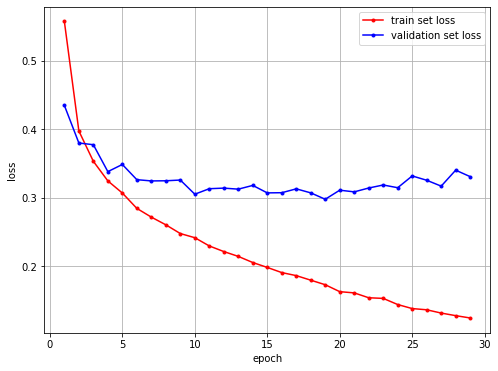

In [26]:
x_len = np.arange(1, len(y_loss)+1)
plt.figure(figsize=(8,6))
plt.plot(x_len, y_loss, c='red', marker='.', label='train set loss')
plt.plot(x_len, y_vloss, c='blue', marker='.', label='validation set loss')

plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()
plt.legend()
plt.show()